In [1]:
import pandas as pd
from numpy import*


In [2]:
data=pd.read_csv("bank_loan.csv")

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
x=data.iloc[:,1:12]
y=data.iloc[:,12]

In [5]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [6]:
to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
x= x.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)



In [7]:
from sklearn.preprocessing import LabelEncoder
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)

In [8]:
Dependents__ = pd.to_numeric(x.Dependents)

In [9]:
x.drop(['Dependents'], axis = 1, inplace = True)

In [10]:
x = pd.concat([x, Dependents__], axis = 1)

In [11]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,1.0,2.0,1,2.0,5849,0.0,NaN,360.0,1.0,3,0.0
1,1.0,1.0,1,2.0,4583,1508.0,128.0,360.0,1.0,1,1.0
2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,3,0.0
3,1.0,1.0,2,2.0,2583,2358.0,120.0,360.0,1.0,3,0.0
4,1.0,2.0,1,2.0,6000,0.0,141.0,360.0,1.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
609,2.0,2.0,1,2.0,2900,0.0,71.0,360.0,1.0,1,0.0
610,1.0,1.0,1,2.0,4106,0.0,40.0,180.0,1.0,1,3.0
611,1.0,1.0,1,2.0,8072,240.0,253.0,360.0,1.0,3,1.0
612,1.0,1.0,1,2.0,7583,0.0,187.0,360.0,1.0,3,2.0


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Education          614 non-null    int64  
 3   Self_Employed      582 non-null    float64
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Dependents         599 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 52.9 KB


In [13]:
from sklearn.impute import SimpleImputer
# First create an Imputer , Stratergy means what we want to write in place of missed value
mss = SimpleImputer (missing_values = nan, strategy = 'mean')  
 
mss = mss.fit (x.iloc[:,[0,1,3,6,7,8,10]])
# update values of X with new values
x.iloc[:,[0,1,3,6,7,8,10]] = mss.transform(x.iloc[:,[0,1,3,6,7,8,10]])


In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    float64
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Dependents         614 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 52.9 KB


In [15]:
from sklearn.ensemble import ExtraTreesRegressor
check=ExtraTreesRegressor()
check.fit(x,y)


ExtraTreesRegressor()

In [16]:
print(check.feature_importances_)

[0.03062756 0.01835242 0.02737212 0.03066289 0.15136194 0.11554038
 0.16331999 0.05192152 0.31012665 0.03633144 0.06438311]


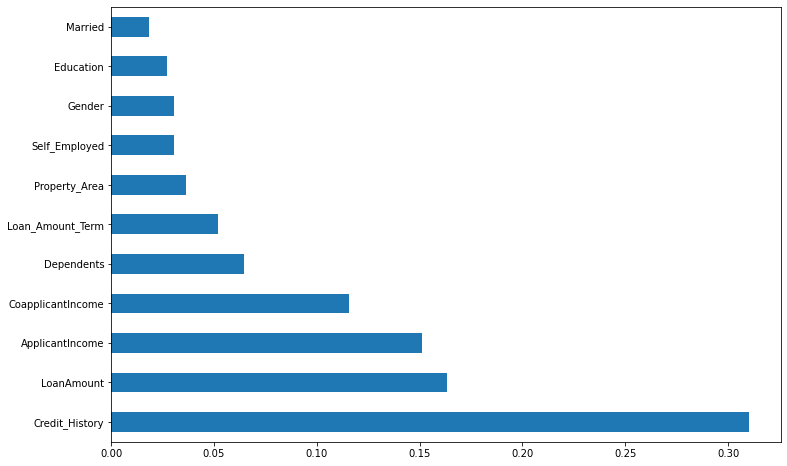

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
f_imp=pd.Series(check.feature_importances_,index=x.columns)
f_imp.nlargest(20).plot(kind="barh")
plt.show()

In [18]:
x1=x.iloc[:,[8,6,4,5,10]]

In [19]:
x1["Credit_History"].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (x1, y, test_size = .10, 
                                                     random_state = 0)


In [21]:

from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression()


LRClassifier.fit(X_train,y_train) # training



prediction = LRClassifier.predict(X_test)# testing 


C:\Users\AZMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, prediction))

0.8709677419354839


In [23]:
x1

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Dependents
0,1.0,146.412162,5849,0.0,0.0
1,1.0,128.000000,4583,1508.0,1.0
2,1.0,66.000000,3000,0.0,0.0
3,1.0,120.000000,2583,2358.0,0.0
4,1.0,141.000000,6000,0.0,0.0
...,...,...,...,...,...
609,1.0,71.000000,2900,0.0,0.0
610,1.0,40.000000,4106,0.0,3.0
611,1.0,253.000000,8072,240.0,1.0
612,1.0,187.000000,7583,0.0,2.0


In [ ]:
import tkinter as tk
from tkinter import messagebox
root=tk.Tk()
canvas=tk.Canvas(root,width=750,height=450)
canvas.configure(bg='black')
                       
canvas.pack()

label=tk.Label(root,text="Credit_history:")
canvas.create_window(100,100,window=label)
label.config(font=("Times",16),bg='grey')

s1 = tk.Scale( root,  
           from_ = .0, to = 1.0, 
           orient = tk.HORIZONTAL,resolution=.1) 
canvas.create_window(380,100,window=s1)
s1.config(font=("Times",18),bg='powder blue')

label1=tk.Label(root,text="LoanAmount(Ths):")
canvas.create_window(115,140,window=label1)
label1.config(font=("Times",16),bg='grey')


s2 = tk.Scale( root,  
           from_ = 50, to = 350, 
           orient = tk.HORIZONTAL,resolution=.5) 


canvas.create_window(380,140,window=s2)
s2.config(font=("Times",18),bg='powder blue')

label2=tk.Label(root,text="ApplicantIncome:")
canvas.create_window(110,180,window=label2)
label2.config(font=("Times",16),bg='grey')

s3= tk.Scale( root,  
           from_ = 1000, to = 40000, 
           orient = tk.HORIZONTAL,resolution=.5) 
canvas.create_window(380,180,window=s3)
s3.config(font=("Times",18),bg='powder blue')


label3=tk.Label(root,text="CoapplicantIncome:")
canvas.create_window(120,220,window=label3)
label3.config(font=("Times",16),bg='grey')

s4= tk.Scale( root,  
           from_ = 1000, to = 50000, 
           orient = tk.HORIZONTAL,resolution=1) 
canvas.create_window(380,220,window=s4)
s4.config(font=("Times",18),bg='powder blue')


label4=tk.Label(root,text="Dependents 0/1 :")
canvas.create_window(107,260,window=label4)
label4.config(font=("Times",16),bg='grey')

s5= tk.Scale( root,  
           from_ = 0, to = 5, 
           orient = tk.HORIZONTAL,resolution=1) 
canvas.create_window(380,262,window=s5)
s5.config(font=("Times",18),bg='powder blue')

lbl5=tk.Label(root,text='LOAN PREDICTOR',bg='brown',font=("Comic sans ms",'18'))
lbl5.pack(padx=60,pady=90,)



def values():
    global NCredit_history
    NCredit_history=float(s1.get())
    
    global NLoanAmount
    NLoanAmount=float(s2.get())
    
    
    global NApplicantIncome
    NApplicantIncome=float(s3.get())
    
    global NCoapplicantIncome
    NCoapplicantIncome=float(s4.get())
    
    global NDependents 
    NDependents =float(s5.get())
    
    Prediction_result=LRClassifier.predict([[NCredit_history, NLoanAmount,NApplicantIncome,NCoapplicantIncome,NDependents]])
    if Prediction_result==1:
        messagebox.showinfo("success","Congrats!!,You are eligible for the loan")
    else:
        messagebox.showinfo("Sorry!","You are not eligible for thr loan")
                    
                       
button=tk.Button(root,text="Predict your loan Status",command=values,bg='yellow')
canvas.create_window(380,350,window=button)
button.config(font=("Times",18))  

    
        

root.title("loan prediction")
root.configure(bg='black')
root.mainloop()